![](https://miro.medium.com/v2/resize:fit:1400/1*SwFB1o_k1LGprN-XRUZQ8w.jpeg)

# 📦 Introduction

## E-Commerce Data Analysis with Machine Learning

In this notebook, we will explore a comprehensive e-commerce dataset provided by Olist, a Brazilian e-commerce platform. The dataset contains information about orders, customers, products, and sellers, offering a rich source of data for analysis and insights generation.

## Dataset Overview

The dataset is stored in an SQLite database file, making it easy to access and query using SQL commands. It consists of two main datasets:

- **Orders Dataset**: Contains information about orders, including order ID, customer ID, order status, order timestamp, and other order-related details.
- **Customers Dataset**: Provides information about customers, such as customer ID, customer demographics, and churn status.

Additionally, the dataset includes other related tables such as products, sellers, payments, and reviews, providing a comprehensive view of the e-commerce ecosystem.

## Objective

The primary objective of this analysis is to gain insights into the e-commerce business and customer behavior. We aim to explore trends, patterns, and relationships within the data to uncover actionable insights that can help optimize business operations and improve customer experience.

Furthermore, we will leverage machine learning techniques to predict customer churn, a critical metric for e-commerce businesses. By predicting churn, we can identify at-risk customers and take proactive measures to retain them, ultimately increasing customer retention and loyalty.

## Approach

We will follow a structured approach to analyze the e-commerce dataset, which includes the following steps:

1. **Data Exploration**: Explore the tables in the database, examine data integrity, and understand the relationships between different entities using the Entity-Relationship Diagram.

2. **Data Analysis**: Identify key metrics and questions for analysis, formulate SQL queries to extract relevant data, and perform exploratory data analysis to uncover insights.

3. **Machine Learning Integration**: Leveraging machine learning techniques, we train predictive models to identify the most important features driving review scores and predict review scores based on selected features. Model performance is evaluated using appropriate metrics such as mean squared error.

4. **Visualizations**: Create informative visualizations to illustrate findings and communicate insights effectively.

5. **Conclusion**: Summarize the key findings, insights, and recommendations derived from the analysis.

By following this approach, we aim to provide valuable insights and actionable recommendations to stakeholders in the e-commerce industry.

# 💼 Import Libraries

In [1]:
import warnings
# Filter out all warnings
warnings.filterwarnings("ignore")

# Import necessary libraries
import sqlite3  # For connecting to SQLite database
import pandas as pd  # For data manipulation and analysis
import numpy as np  # For numerical operations
from sklearn.model_selection import train_test_split  # For splitting data into training and testing sets
from sklearn.ensemble import RandomForestClassifier  # For building a Random Forest classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # For evaluating model performance
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For enhanced data visualization

# Additional libraries for data manipulation and visualization
import datetime  # For working with date and time data
import missingno as msno  # For visualizing missing data patterns
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.metrics import roc_auc_score, roc_curve  # For ROC curve analysis
from sklearn.model_selection import cross_val_score, GridSearchCV  # For hyperparameter tuning
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

# Set visualization style
sns.set(style="whitegrid")

# 🕵️‍♂️ Data Exploration

In [2]:
# Connect to SQLite database
db_path = '/kaggle/input/e-commerce-dataset-by-olist-as-an-sqlite-database/olist.sqlite'
db_connection = sqlite3.connect(db_path)

In [3]:
# Function to execute SQL queries
def execute_query(query):
    return pd.read_sql_query(query, db_connection)

# Explore tables in the database
tables_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = execute_query(tables_query)

# Display tables in a structured format
print("Tables in the database:")
print(tables)

Tables in the database:
                                 name
0   product_category_name_translation
1                             sellers
2                           customers
3                         geolocation
4                         order_items
5                      order_payments
6                       order_reviews
7                              orders
8                            products
9                     leads_qualified
10                       leads_closed


In [4]:
# Visualize first few rows of each table
for table in tables['name']:
    table_data = execute_query(f"SELECT * FROM {table} LIMIT 5;")
    print(f"\n{table}:")
    display(table_data)


product_category_name_translation:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor



sellers:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP



customers:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP



geolocation:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP



order_items:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14



order_payments:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45



order_reviews:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,None,None,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,None,None,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,None,None,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,None,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,None,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53



orders:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00



products:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0



leads_qualified:


,mql_id,first_contact_date,landing_page_id,origin
0,dac32acd4db4c29c230538b72f8dd87d,2018-02-01,88740e65d5d6b056e0cda098e1ea6313,social
1,8c18d1de7f67e60dbd64e3c07d7e9d5d,2017-10-20,007f9098284a86ee80ddeb25d53e0af8,paid_search
2,b4bc852d233dfefc5131f593b538befa,2018-03-22,a7982125ff7aa3b2054c6e44f9d28522,organic_search
3,6be030b81c75970747525b843c1ef4f8,2018-01-22,d45d558f0daeecf3cccdffe3c59684aa,email
4,5420aad7fec3549a85876ba1c529bd84,2018-02-21,b48ec5f3b04e9068441002a19df93c6c,organic_search



leads_closed:


,mql_id,seller_id,sdr_id,sr_id,won_date,business_segment,lead_type,lead_behaviour_profile,has_company,has_gtin,average_stock,business_type,declared_product_catalog_size,declared_monthly_revenue
0,5420aad7fec3549a85876ba1c529bd84,2c43fb513632d29b3b58df74816f1b06,a8387c01a09e99ce014107505b92388c,4ef15afb4b2723d8f3d81e51ec7afefe,2018-02-26 19:58:54,pet,online_medium,cat,None,None,None,reseller,None,0.0
1,a555fb36b9368110ede0f043dfc3b9a0,bbb7d7893a450660432ea6652310ebb7,09285259593c61296eef10c734121d5b,d3d1e91a157ea7f90548eef82f1955e3,2018-05-08 20:17:59,car_accessories,industry,eagle,None,None,None,reseller,None,0.0
2,327174d3648a2d047e8940d7d15204ca,612170e34b97004b3ba37eae81836b4c,b90f87164b5f8c2cfa5c8572834dbe3f,6565aa9ce3178a5caf6171827af3a9ba,2018-06-05 17:27:23,home_appliances,online_big,cat,None,None,None,reseller,None,0.0
3,f5fee8f7da74f4887f5bcae2bafb6dd6,21e1781e36faf92725dde4730a88ca0f,56bf83c4bb35763a51c2baab501b4c67,d3d1e91a157ea7f90548eef82f1955e3,2018-01-17 13:51:03,food_drink,online_small,None,None,None,None,reseller,None,0.0
4,ffe640179b554e295c167a2f6be528e0,ed8cb7b190ceb6067227478e48cf8dde,4b339f9567d060bcea4f5136b9f5949e,d3d1e91a157ea7f90548eef82f1955e3,2018-07-03 20:17:45,home_appliances,industry,wolf,None,None,None,manufacturer,None,0.0


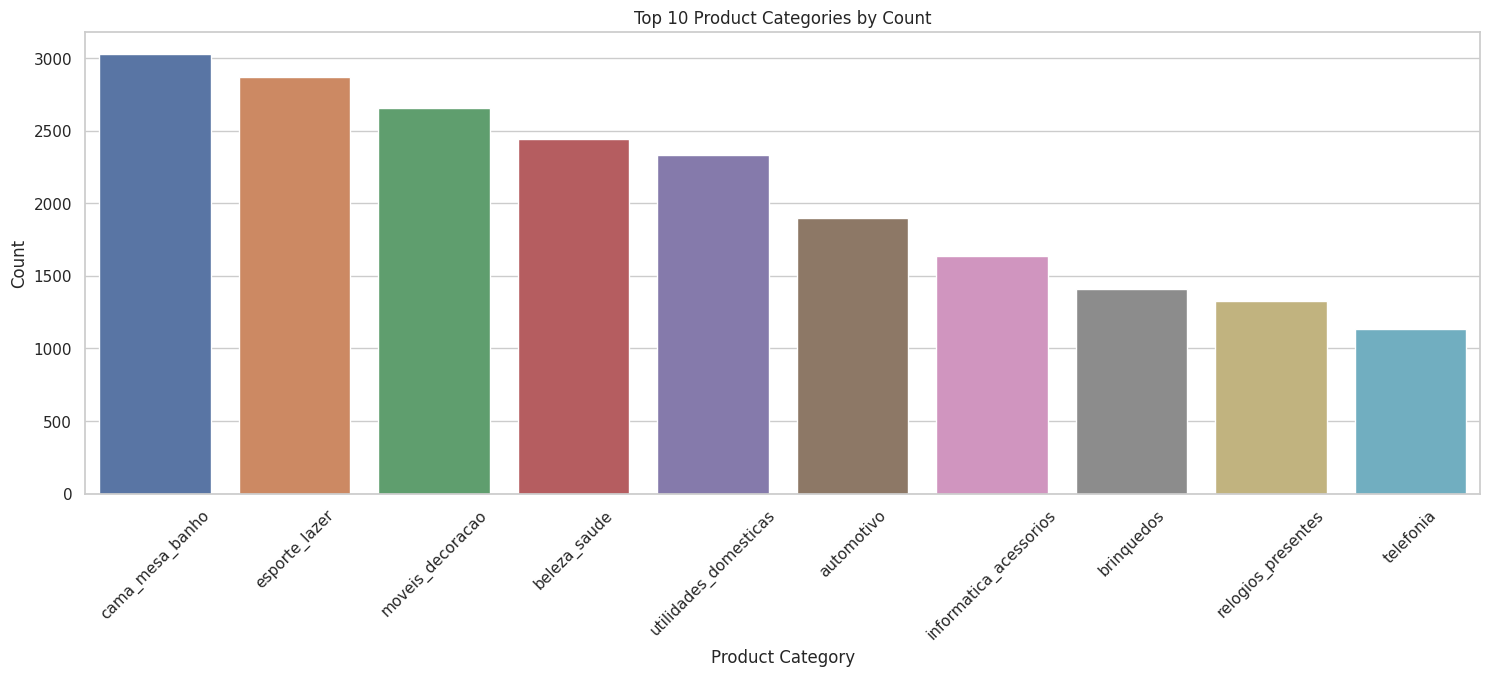

In [5]:
# Distribution of product categories
product_category_query = "SELECT product_category_name, COUNT(*) AS count FROM products GROUP BY product_category_name ORDER BY count DESC LIMIT 10;"
product_category_data = execute_query(product_category_query)

plt.figure(figsize=(18, 6))
sns.barplot(x='product_category_name', y='count', data=product_category_data)
plt.title('Top 10 Product Categories by Count')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

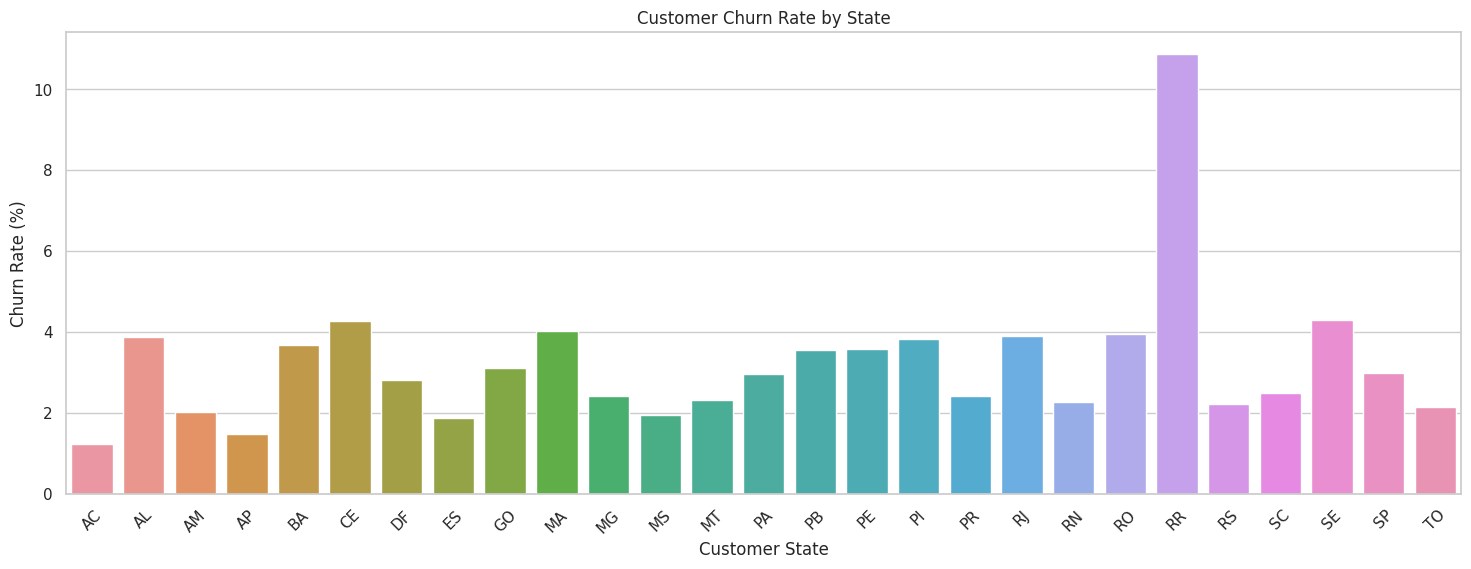

In [6]:
# Query to analyze customer churn
customer_churn_query = """
SELECT customer_state, 
       COUNT(*) AS total_customers, 
       SUM(CASE WHEN order_status = 'delivered' THEN 0 ELSE 1 END) AS churned_customers
FROM orders o
JOIN customers c ON o.customer_id = c.customer_id
GROUP BY customer_state;
"""

# Execute query and fetch data
customer_churn_data = execute_query(customer_churn_query)

# Calculate churn rate
customer_churn_data['churn_rate'] = (customer_churn_data['churned_customers'] / customer_churn_data['total_customers']) * 100

# Visualize churn rate by state
plt.figure(figsize=(18, 6))
sns.barplot(x='customer_state', y='churn_rate', data=customer_churn_data)
plt.title('Customer Churn Rate by State')
plt.xlabel('Customer State')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=45)
plt.show()

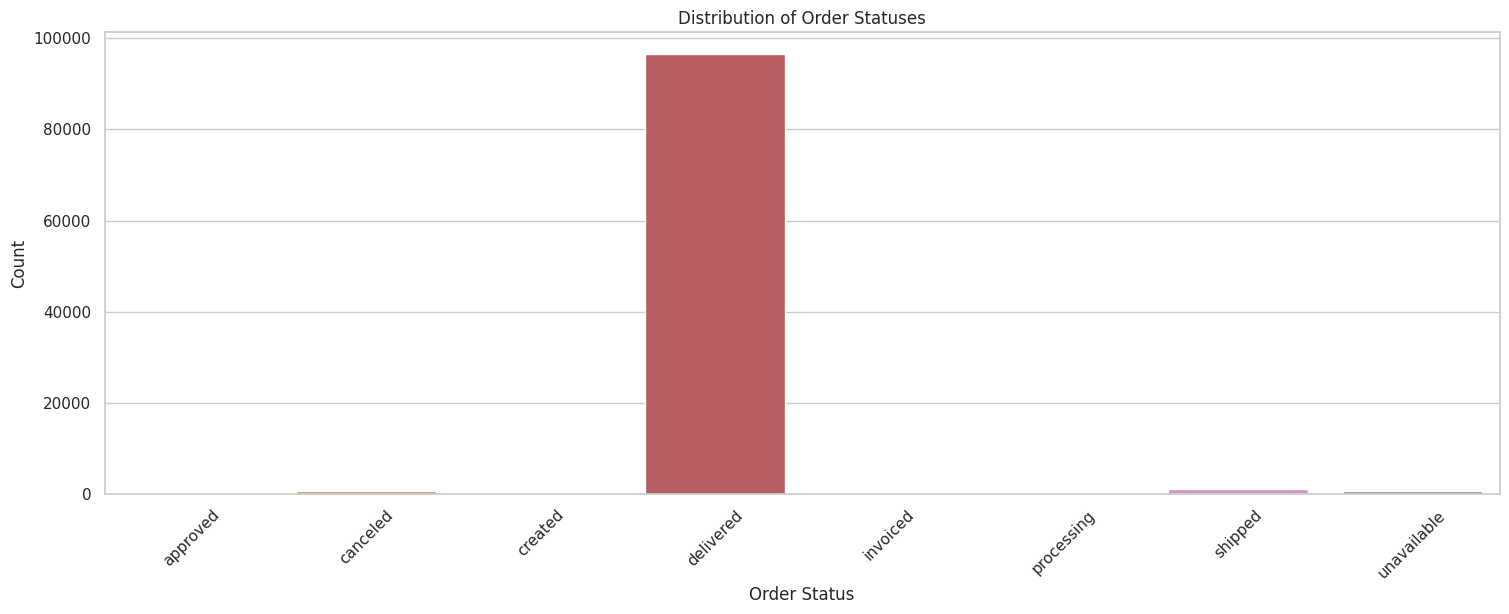

In [7]:
# Plotting distribution of order statuses
order_status_query = "SELECT order_status, COUNT(*) AS count FROM orders GROUP BY order_status;"
order_status_data = execute_query(order_status_query)

plt.figure(figsize=(18, 6))
sns.barplot(x='order_status', y='count', data=order_status_data)
plt.title('Distribution of Order Statuses')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

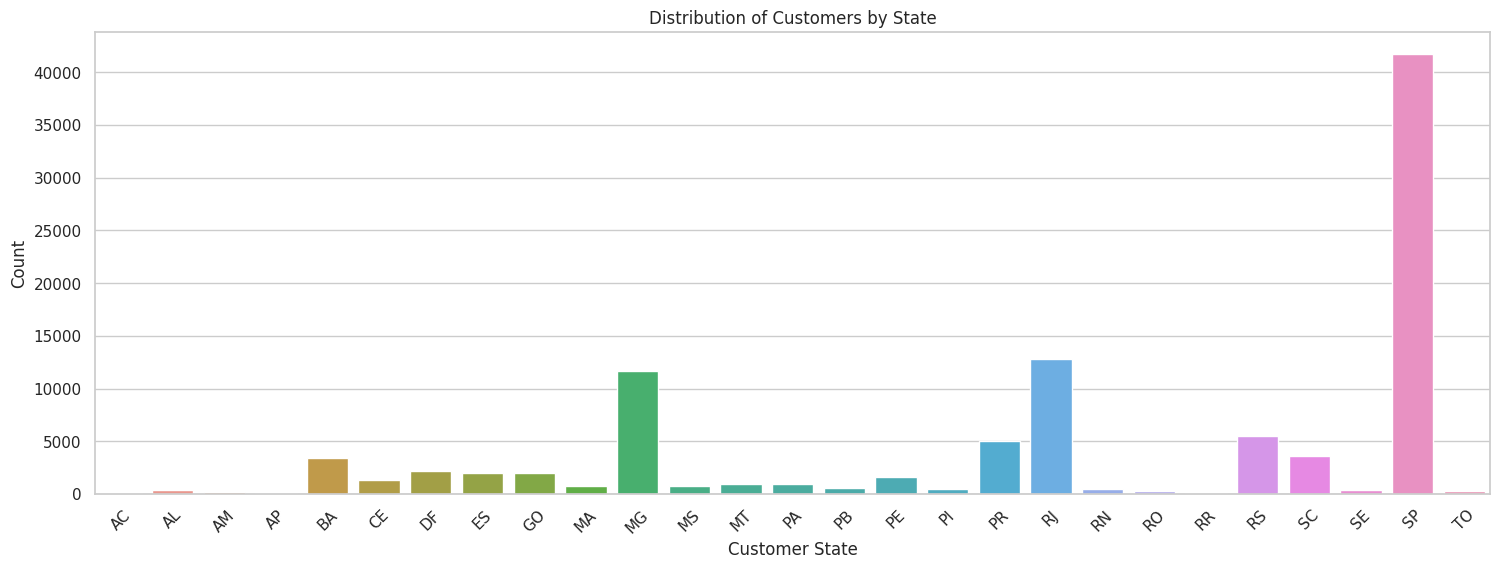

In [8]:
# Distribution of customer demographics (e.g., customer states)
customer_state_query = "SELECT customer_state, COUNT(*) AS count FROM customers GROUP BY customer_state;"
customer_state_data = execute_query(customer_state_query)

plt.figure(figsize=(18, 6))
sns.barplot(x='customer_state', y='count', data=customer_state_data)
plt.title('Distribution of Customers by State')
plt.xlabel('Customer State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

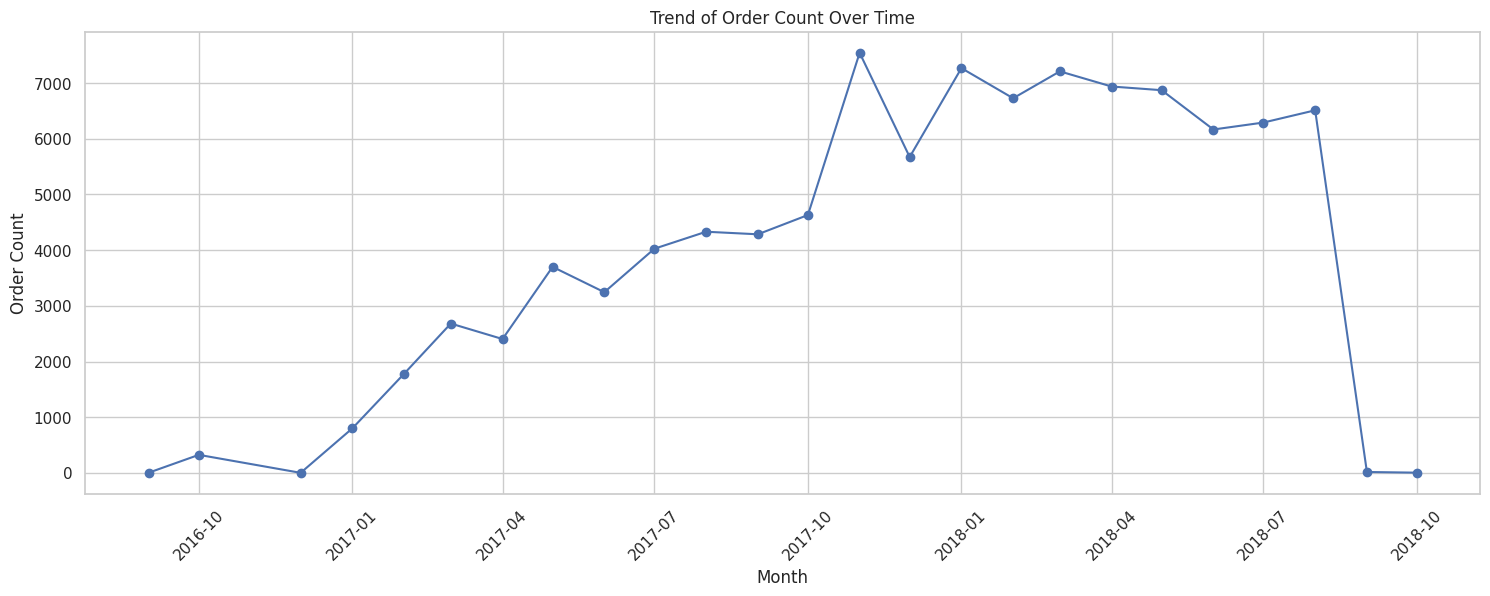

In [9]:
# Trend of order count over time
order_date_query = "SELECT strftime('%Y-%m', order_purchase_timestamp) AS month, COUNT(*) AS count \
                    FROM orders \
                    GROUP BY strftime('%Y-%m', order_purchase_timestamp);"
order_date_data = execute_query(order_date_query)
order_date_data['month'] = pd.to_datetime(order_date_data['month'])

plt.figure(figsize=(18, 6))
plt.plot(order_date_data['month'], order_date_data['count'], marker='o', linestyle='-')
plt.title('Trend of Order Count Over Time')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

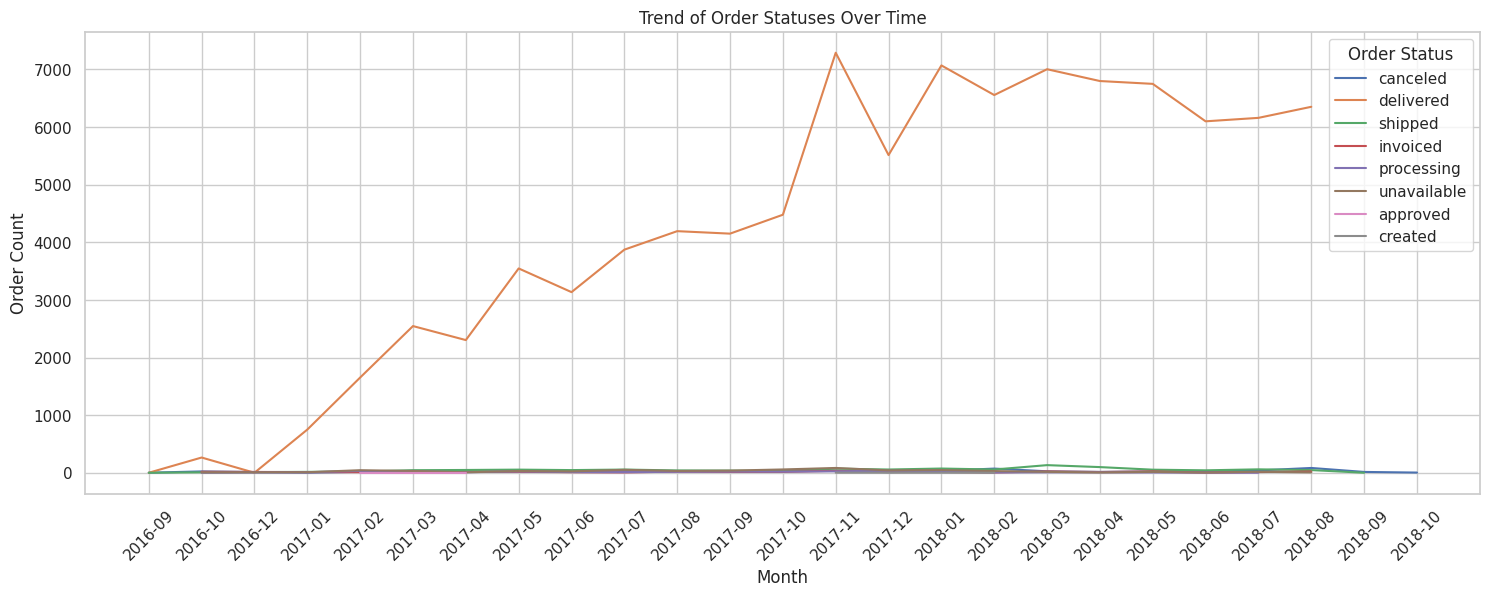

In [10]:
# Query to get the count of orders for each order status over time
order_status_time_query = """
SELECT strftime('%Y-%m', order_purchase_timestamp) AS month, 
       order_status, 
       COUNT(*) AS count
FROM orders
GROUP BY strftime('%Y-%m', order_purchase_timestamp), order_status
ORDER BY month;
"""

# Execute query and fetch data
order_status_time_data = execute_query(order_status_time_query)

# Plotting the trend of order statuses over time
plt.figure(figsize=(18, 6))
sns.lineplot(x='month', y='count', hue='order_status', data=order_status_time_data)
plt.title('Trend of Order Statuses Over Time')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.legend(title='Order Status')
plt.show()

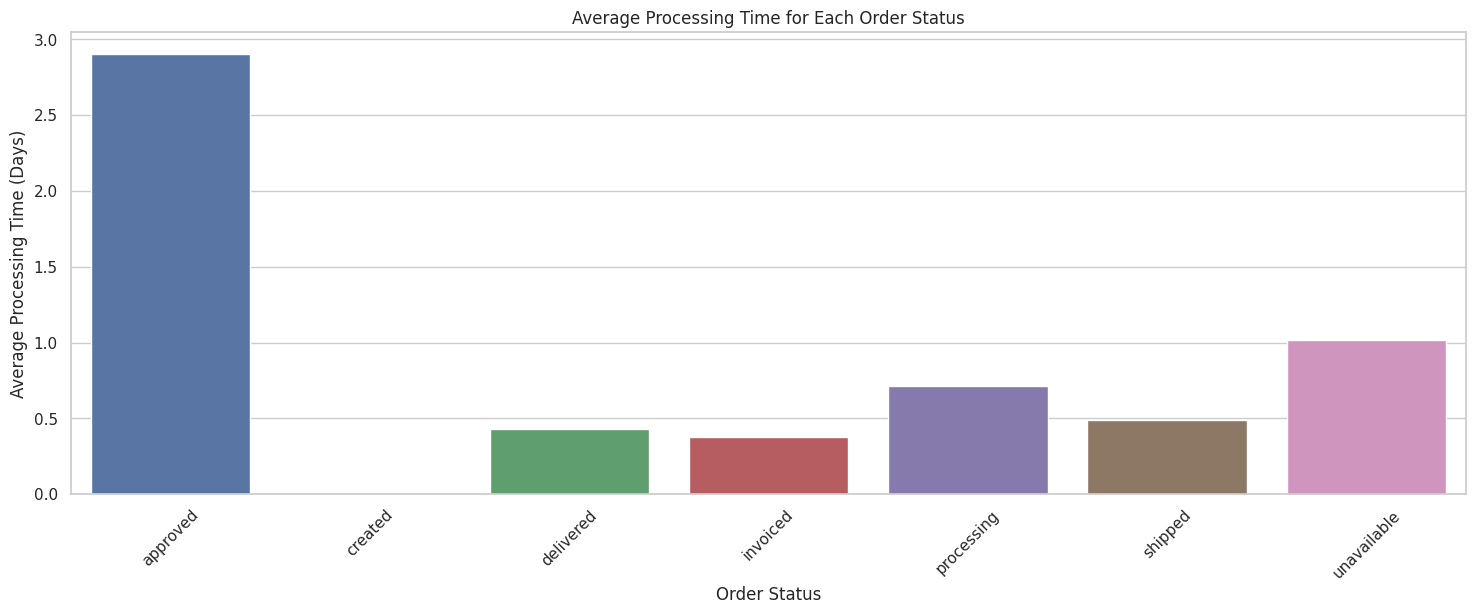

In [11]:
# Query to calculate the average time taken to process orders for each order status
average_processing_time_query = """
SELECT order_status,
       AVG(julianday(order_approved_at) - julianday(order_purchase_timestamp)) AS avg_processing_time
FROM orders
WHERE order_status != 'canceled'  -- Exclude canceled orders
GROUP BY order_status;
"""

# Execute query and fetch data
average_processing_time_data = execute_query(average_processing_time_query)

# Plotting the average processing time for each order status
plt.figure(figsize=(18, 6))
sns.barplot(x='order_status', y='avg_processing_time', data=average_processing_time_data)
plt.title('Average Processing Time for Each Order Status')
plt.xlabel('Order Status')
plt.ylabel('Average Processing Time (Days)')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Query to get the count of canceled orders with cancellation reasons
canceled_orders_query = """
SELECT o.order_id, 
       o.order_status, 
       r.review_comment_title, 
       r.review_comment_message
FROM orders o
JOIN order_reviews r ON o.order_id = r.order_id
WHERE o.order_status = 'canceled' 
AND r.review_comment_title IS NOT NULL;
"""

# Execute query and fetch data
canceled_orders_data = execute_query(canceled_orders_query)

# Displaying reasons for order cancellations
print("Reasons for Order Cancellations:")
display(canceled_orders_data)

Reasons for Order Cancellations:


,order_id,order_status,review_comment_title,review_comment_message
0,00b1cb0320190ca0daa2c88b35206009,canceled,Entregaram produto errado,Comprei dois fones de ouvido com valor de R$ 5...
1,0966b61e30c4a07edbd7523f59b3f3e4,canceled,Não recebi o produto,Comprei o produto e depois eles informaram que...
2,8d4c637f1accf7a88a4555f02741e606,canceled,Adorei,None
3,5290c34bd38a8a095b885f13958db1e1,canceled,3,None
4,03310aa823a66056268a3bab36e827fb,canceled,Produto errado,Entrega do produto diferente do solicitado\r\n...
...,...,...,...,...
108,0b16257b1b7ee0922ea03954f2cae85a,canceled,"sim, recomendo ***",Quando da compra me foi dito que o produto ser...
109,7b417e4ab50fe706033d4fe21c659f3b,canceled,boa,eu gosto do shoptaime sim recomendaria pois co...
110,8501926dd0837d694fc5af339c02a6b2,canceled,nao recomendo,segunda vez que comprei o mesmo produto e nao ...
111,7813842ae95e8c497fc0233232ae815a,canceled,Produto errado,Entrega do produto diferente do solicitado\r\n...


# 🧐 Data Cleaning

In [13]:
# Check for missing values in each table
for table in tables['name']:
    table_data = execute_query(f"SELECT * FROM {table};")
    missing_values = table_data.isnull().sum()
    if missing_values.sum() > 0:
        print(f"\nMissing values in table {table}:")
        print(missing_values)


Missing values in table order_reviews:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

Missing values in table orders:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Missing values in table products:
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing val

In [14]:
# Function to clean missing values
def clean_missing_values(df):
    cleaned_df = df.dropna()  # Drop rows with any missing values
    return cleaned_df

# Define a function to re-check missing values
def recheck_missing_values(cleaned_tables):
    for table_name, table_data in cleaned_tables.items():
        missing_values = table_data.isnull().sum()
        if missing_values.sum() == 0:
            print(f"All missing values cleaned in table {table_name}.")
        else:
            print(f"Missing values still exist in table {table_name}:")
            print(missing_values)

# Clean missing values from each table
cleaned_tables = {}
for table_name in tables['name']:
    table_data = execute_query(f"SELECT * FROM {table_name};")
    cleaned_table_data = clean_missing_values(table_data)
    cleaned_tables[table_name] = cleaned_table_data

# Re-check missing values
recheck_missing_values(cleaned_tables)

All missing values cleaned in table product_category_name_translation.
All missing values cleaned in table sellers.
All missing values cleaned in table customers.
All missing values cleaned in table geolocation.
All missing values cleaned in table order_items.
All missing values cleaned in table order_payments.
All missing values cleaned in table order_reviews.
All missing values cleaned in table orders.
All missing values cleaned in table products.
All missing values cleaned in table leads_qualified.
All missing values cleaned in table leads_closed.


In [15]:
# Check for missing values in cleaned_table_data
for table_name, table_data in cleaned_tables.items():
    missing_values = table_data.isnull().sum()
    if missing_values.sum() == 0:
        print(f"\nMissing values in table {table_name} after cleaning:")
        print(missing_values)


Missing values in table product_category_name_translation after cleaning:
product_category_name            0
product_category_name_english    0
dtype: int64

Missing values in table sellers after cleaning:
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Missing values in table customers after cleaning:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing values in table geolocation after cleaning:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

Missing values in table order_items after cleaning:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value       

# 🤖 Machine Learning

In [16]:
# Define the important features for machine learning
important_features = ['customer_id', 'customer_unique_id', 'customer_city', 'customer_state',
                      'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
                      'order_delivered_customer_date', 'order_estimated_delivery_date', 'order_status',
                      'payment_type', 'payment_installments', 'payment_value', 'review_score']

# Initialize an empty DataFrame to store the selected features
ml_df = pd.DataFrame()

# Add important features from the cleaned tables to the DataFrame
ml_df['customer_id'] = cleaned_tables['customers']['customer_id']
ml_df['customer_unique_id'] = cleaned_tables['customers']['customer_unique_id']
ml_df['customer_city'] = cleaned_tables['customers']['customer_city']
ml_df['customer_state'] = cleaned_tables['customers']['customer_state']
ml_df['order_purchase_timestamp'] = cleaned_tables['orders']['order_purchase_timestamp']
ml_df['order_approved_at'] = cleaned_tables['orders']['order_approved_at']
ml_df['order_delivered_carrier_date'] = cleaned_tables['orders']['order_delivered_carrier_date']
ml_df['order_delivered_customer_date'] = cleaned_tables['orders']['order_delivered_customer_date']
ml_df['order_estimated_delivery_date'] = cleaned_tables['orders']['order_estimated_delivery_date']
ml_df['order_status'] = cleaned_tables['orders']['order_status']
ml_df['payment_type'] = cleaned_tables['order_payments']['payment_type']
ml_df['payment_installments'] = cleaned_tables['order_payments']['payment_installments']
ml_df['payment_value'] = cleaned_tables['order_payments']['payment_value']
ml_df['review_score'] = cleaned_tables['order_reviews']['review_score']

# Display the first few rows of the DataFrame
print("DataFrame after data cleaning and feature selection:")
display(ml_df.head())

DataFrame after data cleaning and feature selection:


,customer_id,customer_unique_id,customer_city,customer_state,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_status,payment_type,payment_installments,payment_value,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,delivered,credit_card,8,99.33,NaN
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,delivered,credit_card,1,24.39,NaN
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,delivered,credit_card,1,65.71,NaN
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,delivered,credit_card,8,107.78,NaN
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,delivered,credit_card,2,128.45,NaN


In [17]:
ml_df.shape

(99441, 14)

In [18]:
ml_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    99441 non-null  object 
 1   customer_unique_id             99441 non-null  object 
 2   customer_city                  99441 non-null  object 
 3   customer_state                 99441 non-null  object 
 4   order_purchase_timestamp       96461 non-null  object 
 5   order_approved_at              96461 non-null  object 
 6   order_delivered_carrier_date   96461 non-null  object 
 7   order_delivered_customer_date  96461 non-null  object 
 8   order_estimated_delivery_date  96461 non-null  object 
 9   order_status                   96461 non-null  object 
 10  payment_type                   99441 non-null  object 
 11  payment_installments           99441 non-null  int64  
 12  payment_value                  99441 non-null 

In [19]:
ml_df.describe()

,payment_installments,payment_value,review_score
count,99441.000000,99441.000000,9839.000000
mean,2.854336,154.285607,3.837585
std,2.686928,217.542274,1.556435
min,0.000000,0.000000,1.000000
25%,1.000000,56.870000,3.000000
50%,1.000000,100.000000,5.000000
75%,4.000000,172.140000,5.000000
max,24.000000,13664.080000,5.000000


In [20]:
ml_df.isna().sum()

customer_id                          0
customer_unique_id                   0
customer_city                        0
customer_state                       0
order_purchase_timestamp          2980
order_approved_at                 2980
order_delivered_carrier_date      2980
order_delivered_customer_date     2980
order_estimated_delivery_date     2980
order_status                      2980
payment_type                         0
payment_installments                 0
payment_value                        0
review_score                     89602
dtype: int64

In [21]:
# Handling missing timestamps by forward filling
ml_df['order_purchase_timestamp'] = ml_df['order_purchase_timestamp'].fillna(method='ffill')
ml_df['order_approved_at'] = ml_df['order_approved_at'].fillna(method='ffill')
ml_df['order_delivered_carrier_date'] = ml_df['order_delivered_carrier_date'].fillna(method='ffill')
ml_df['order_delivered_customer_date'] = ml_df['order_delivered_customer_date'].fillna(method='ffill')
ml_df['order_estimated_delivery_date'] = ml_df['order_estimated_delivery_date'].fillna(method='ffill')

# Handling missing review scores by imputing with the median score
median_review_score = ml_df['review_score'].median()
ml_df['review_score'] = ml_df['review_score'].fillna(median_review_score)
ml_df.dropna(inplace=True)

In [22]:
ml_df.isna().sum()

customer_id                      0
customer_unique_id               0
customer_city                    0
customer_state                   0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_status                     0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
dtype: int64

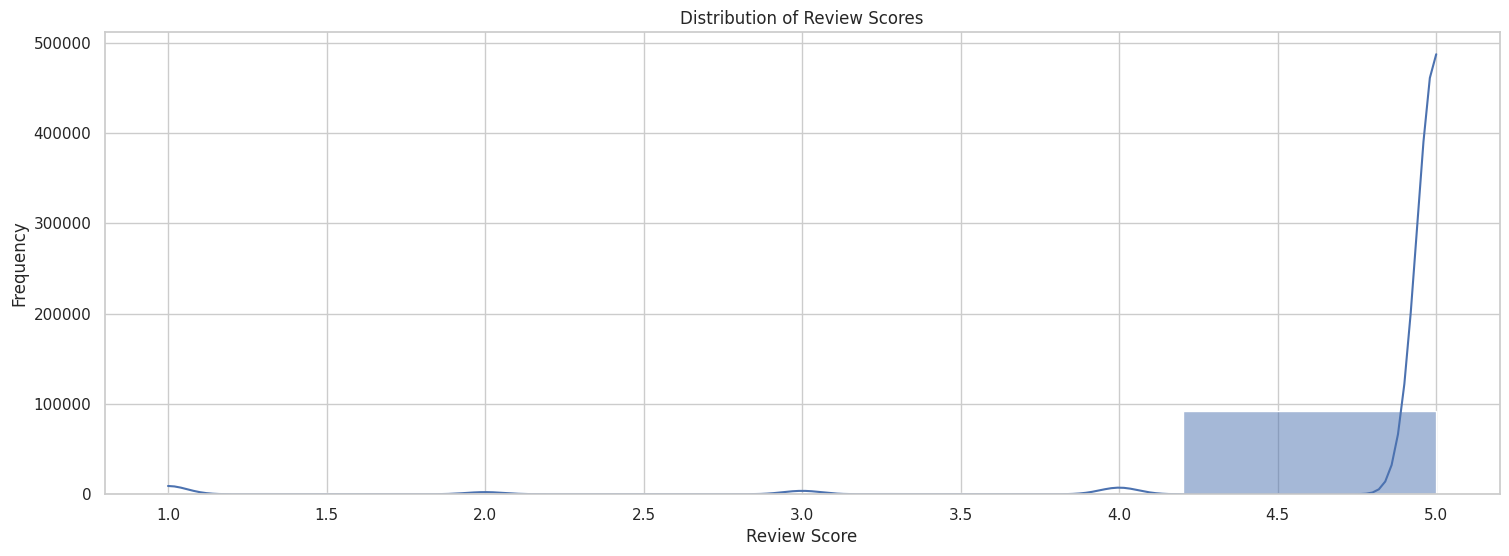

In [23]:
# Distribution of review scores
plt.figure(figsize=(18, 6))
sns.histplot(ml_df['review_score'], bins=5, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

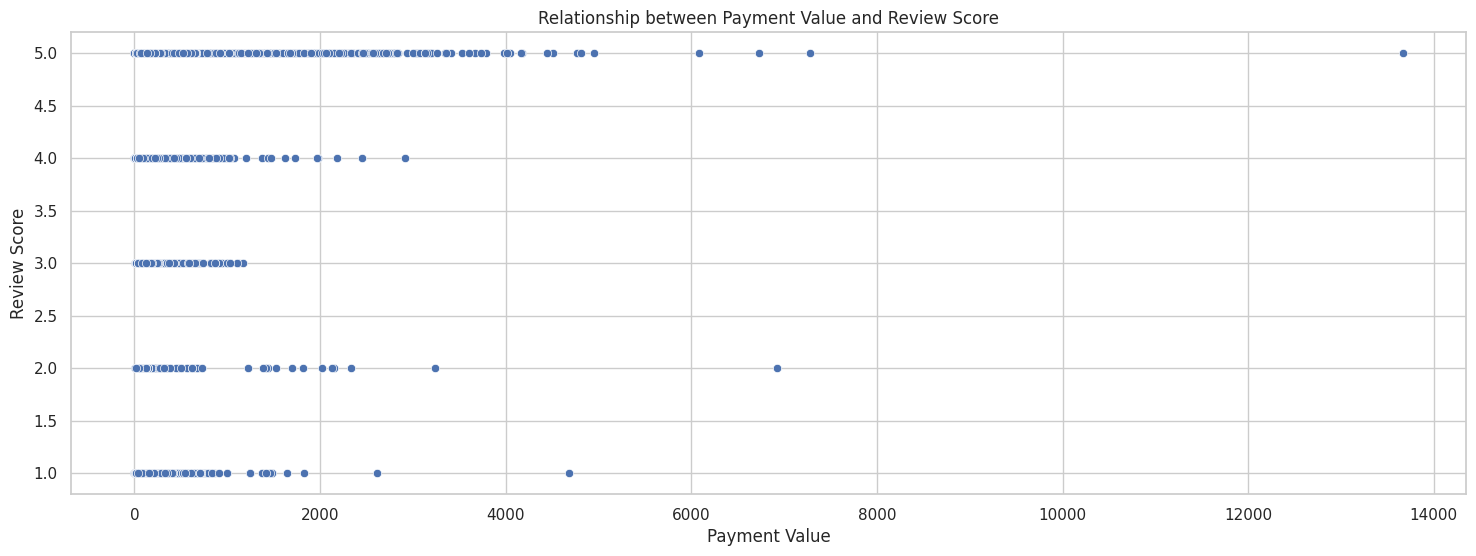

In [24]:
plt.figure(figsize=(18, 6))
sns.scatterplot(x='payment_value', y='review_score', data=ml_df)
plt.title('Relationship between Payment Value and Review Score')
plt.xlabel('Payment Value')
plt.ylabel('Review Score')
plt.show()

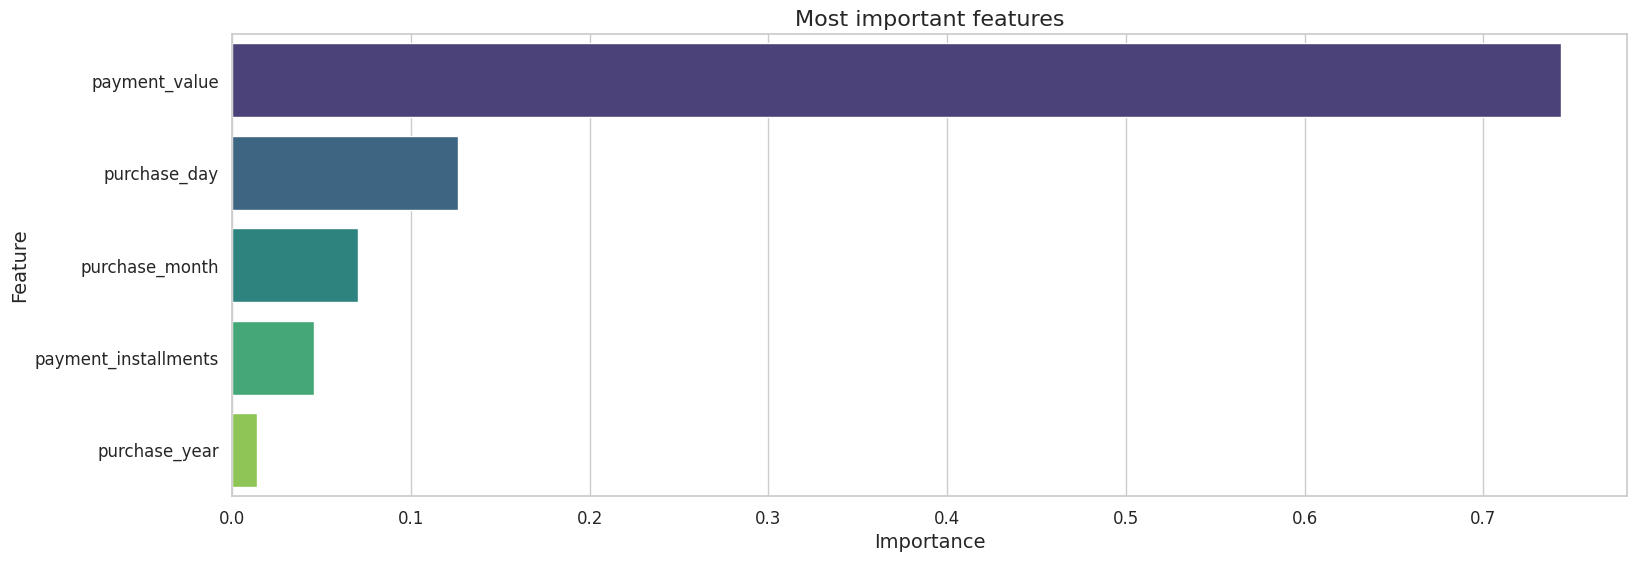

Mean Squared Error: 0.36519522881677546


In [25]:
# For instance, let's extract the year, month, and day from the order_purchase_timestamp
ml_df['order_purchase_timestamp'] = pd.to_datetime(ml_df['order_purchase_timestamp'])
ml_df['purchase_year'] = ml_df['order_purchase_timestamp'].dt.year
ml_df['purchase_month'] = ml_df['order_purchase_timestamp'].dt.month
ml_df['purchase_day'] = ml_df['order_purchase_timestamp'].dt.day

# Selecting features and target variable
X = ml_df[['payment_installments', 'payment_value', 'purchase_year', 'purchase_month', 'purchase_day']]
y = ml_df['review_score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Sort features by their importance
sorted_indices = np.argsort(feature_importances)[::-1]

# Select the top 20 most important features
top_features = X.columns[sorted_indices][:20]

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns[sorted_indices][:20], 
                                      'Importance': feature_importances[sorted_indices][:20]})

# Plotting
plt.figure(figsize=(18, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Most important features', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)